In [2]:
###9.2.19

from nilearn import datasets

# haxby dataset to have anatomical image, EPI images and masks
haxby_dataset = datasets.fetch_haxby()
haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# localizer dataset to have contrast maps
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

from nilearn import plotting

/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


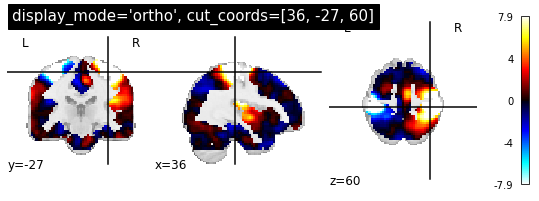

In [3]:
plotting.plot_stat_map(stat_img, display_mode='ortho',
                       cut_coords=[36, -27, 60],
                       title="display_mode='ortho', cut_coords=[36, -27, 60]")

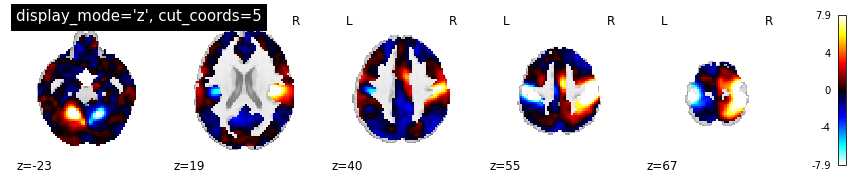

In [4]:
plotting.plot_stat_map(stat_img, display_mode='z', cut_coords=5,
                       title="display_mode='z', cut_coords=5")

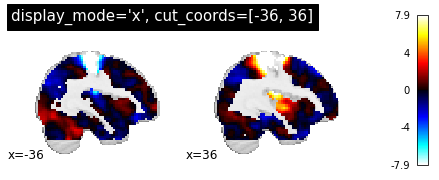

In [5]:
plotting.plot_stat_map(stat_img, display_mode='x',
                       cut_coords=[-36, 36],
                       title="display_mode='x', cut_coords=[-36, 36]")

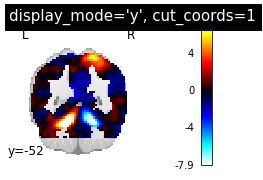

In [6]:
plotting.plot_stat_map(stat_img, display_mode='y', cut_coords=1,
                       title="display_mode='y', cut_coords=1")

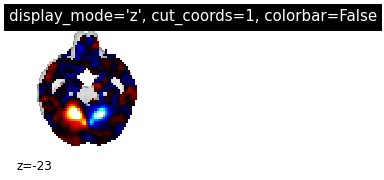

In [7]:
plotting.plot_stat_map(stat_img, display_mode='z',
                       cut_coords=1, colorbar=False,
                       title="display_mode='z', cut_coords=1, colorbar=False")

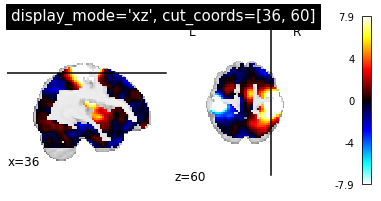

In [8]:
plotting.plot_stat_map(stat_img, display_mode='xz',
                       cut_coords=[36, 60],
                       title="display_mode='xz', cut_coords=[36, 60]")

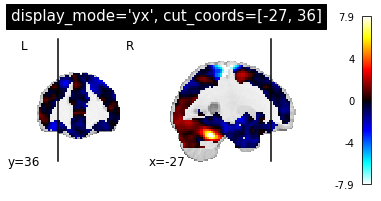

In [9]:
plotting.plot_stat_map(stat_img, display_mode='yx',
                       cut_coords=[-27, 36],
                       title="display_mode='yx', cut_coords=[-27, 36]")

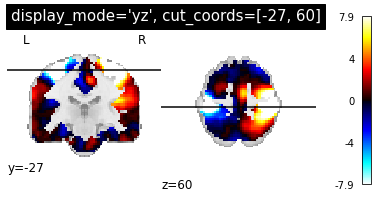

In [10]:
plotting.plot_stat_map(stat_img, display_mode='yz',
                       cut_coords=[-27, 60],
                       title="display_mode='yz', cut_coords=[-27, 60]")

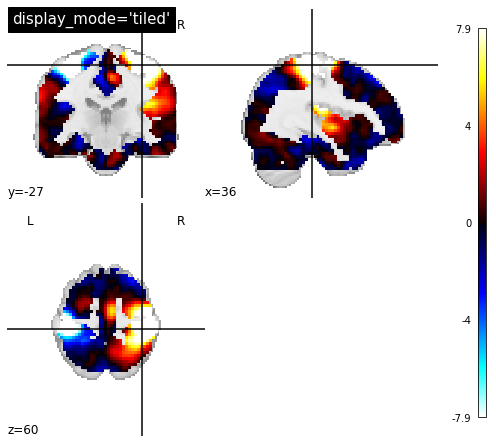

In [11]:
plotting.plot_stat_map(stat_img, display_mode='tiled',
                       cut_coords=[36, -27, 60],
                       title="display_mode='tiled'")

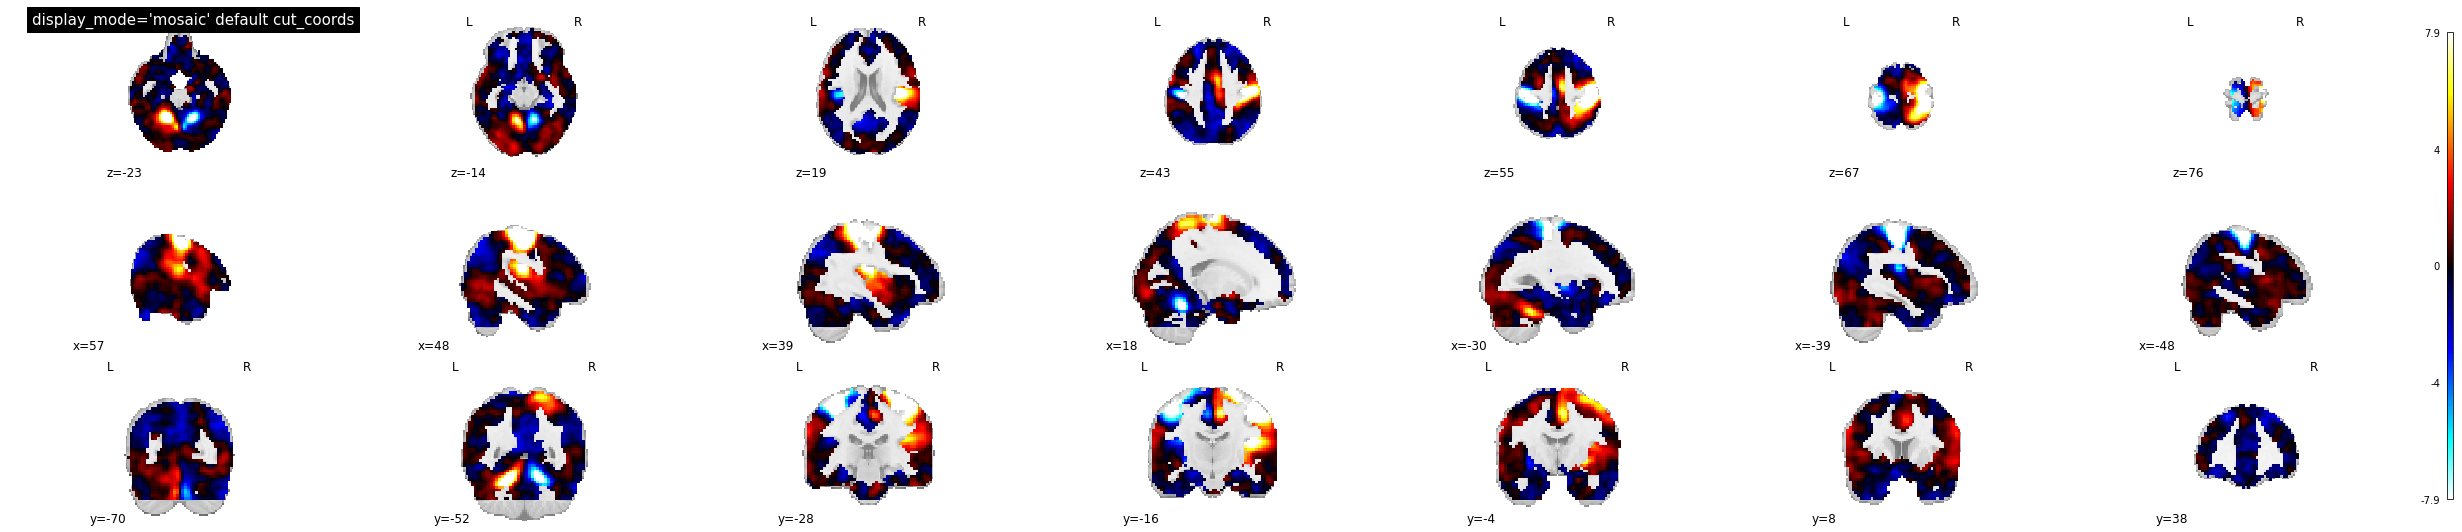

In [12]:
plotting.plot_stat_map(stat_img, display_mode='mosaic',
                       title="display_mode='mosaic' default cut_coords")

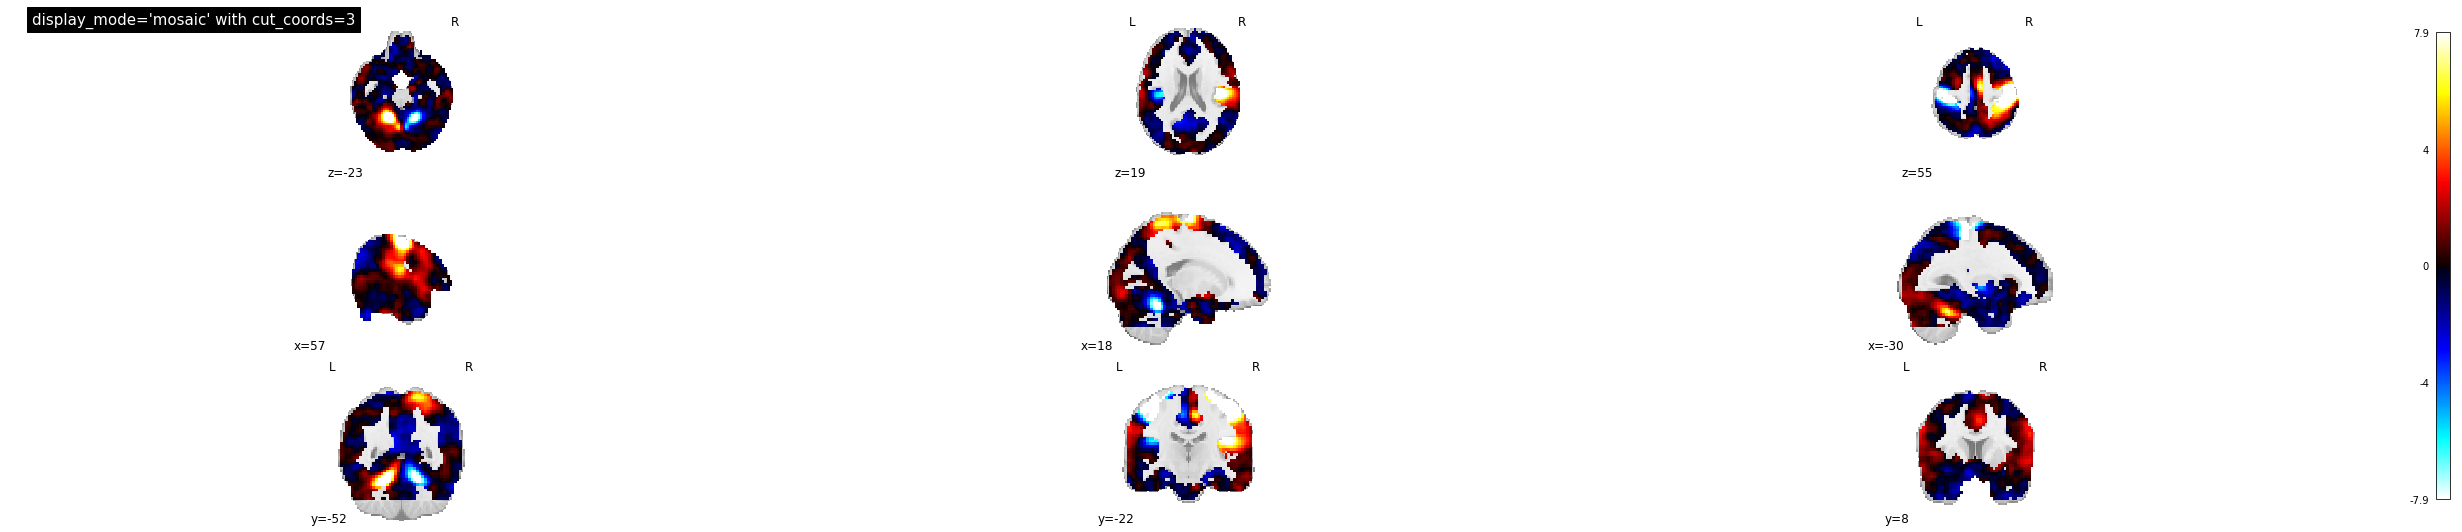

In [13]:
plotting.plot_stat_map(stat_img, display_mode='mosaic',
                       cut_coords=3,
                       title="display_mode='mosaic' with cut_coords=3")

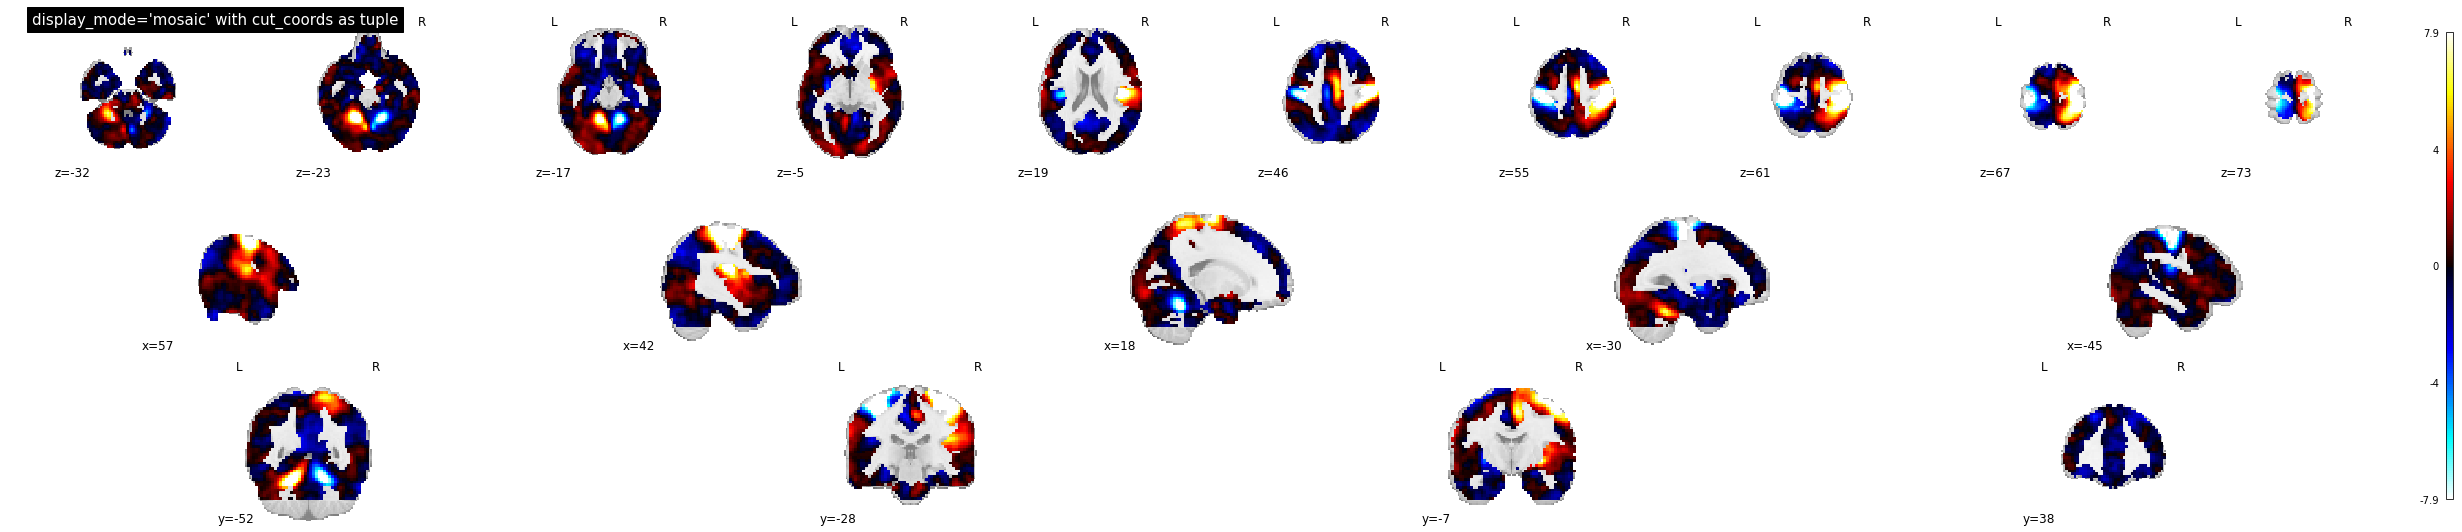

In [14]:
plotting.plot_stat_map(stat_img, display_mode='mosaic',
                       cut_coords=(5, 4, 10),
                       title="display_mode='mosaic' with cut_coords as tuple")

In [15]:
# Import image processing tool for basic processing of functional brain image
from nilearn import image

# Compute voxel-wise mean functional image across time dimension. Now we have
# functional image in 3D assigned in mean_haxby_img
mean_haxby_img = image.mean_img(haxby_func_filename)

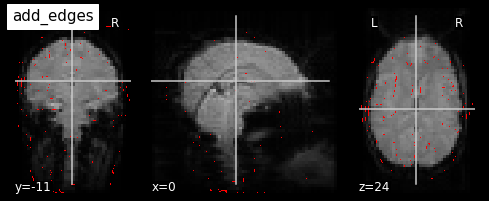

In [16]:
# First, we call the `plot_anat` plotting function, with a background image
# as first argument, in this case the mean fMRI image.

display = plotting.plot_anat(mean_haxby_img, title="add_edges")

# We are now able to use add_edges method inherited in plotting object named as
# display. First argument - anatomical image  and by default edges will be
# displayed as red 'r', to choose different colors green 'g' and  blue 'b'.
display.add_edges(haxby_anat_filename)

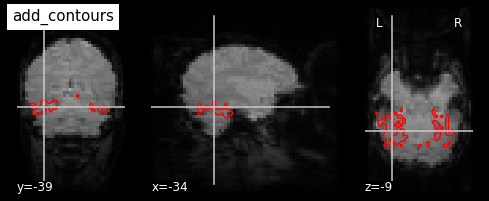

In [17]:
# As seen before, we call the `plot_anat` function with a background image
# as first argument, in this case again the mean fMRI image and argument
# `cut_coords` as list for manual cut with coordinates pointing at masked
# brain regions
display = plotting.plot_anat(mean_haxby_img, title="add_contours",
                             cut_coords=[-34, -39, -9])
# Now use `add_contours` in display object with the path to a mask image from
# the Haxby dataset as first argument and argument `levels` given as list
# of values to select particular level in the contour to display and argument
# `colors` specified as red 'r' to see edges as red in color.
# See help on matplotlib.pyplot.contour to use more options with this method
display.add_contours(haxby_mask_filename, levels=[0.5], colors='r')

/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


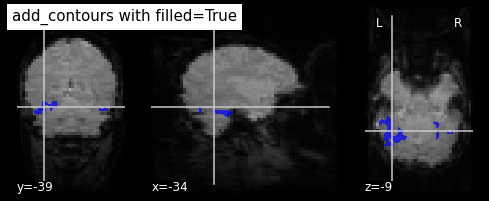

In [18]:
display = plotting.plot_anat(mean_haxby_img,
                             title="add_contours with filled=True",
                             cut_coords=[-34, -39, -9])

# By default, no color fillings will be shown using `add_contours`. To see
# contours with color fillings use argument filled=True. contour colors are
# changed to blue 'b' with alpha=0.7 sets the transparency of color fillings.
# See help on matplotlib.pyplot.contourf to use more options given that filled
# should be True
display.add_contours(haxby_mask_filename, filled=True, alpha=0.7,
                     levels=[0.5], colors='b')

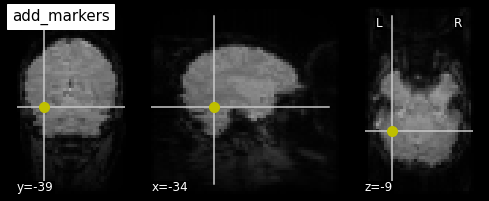

In [19]:
display = plotting.plot_anat(mean_haxby_img, title="add_markers",
                             cut_coords=[-34, -39, -9])

# Coordinates of seed regions should be specified in first argument and second
# argument `marker_color` denotes color of the sphere in this case yellow 'y'
# and third argument `marker_size` denotes size of the sphere
coords = [(-34, -39, -9)]
display.add_markers(coords, marker_color='y', marker_size=100)

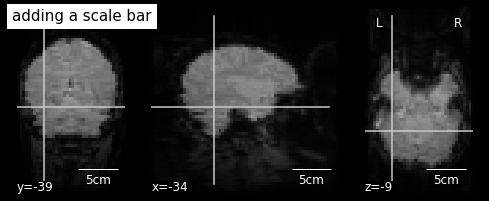

In [20]:
display = plotting.plot_anat(mean_haxby_img,
                             title="adding a scale bar",
                             cut_coords=[-34, -39, -9])
display.annotate(scalebar=True)

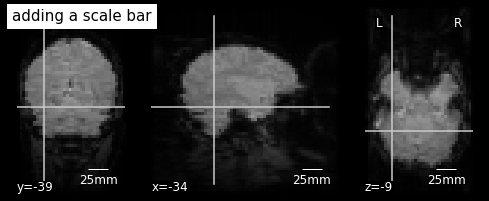

In [21]:
display = plotting.plot_anat(mean_haxby_img,
                             title="adding a scale bar",
                             cut_coords=[-34, -39, -9])
display.annotate(scalebar=True, scale_size=25, scale_units='mm')

In [22]:
# Contrast maps plotted with function `plot_stat_map` can be saved using an
# inbuilt parameter output_file as filename + .extension as string. Valid
# extensions are .png, .pdf, .svg
plotting.plot_stat_map(stat_img,
                       title='Using plot_stat_map output_file',
                       output_file='plot_stat_map.png')

In [23]:
display = plotting.plot_stat_map(stat_img,
                                 title='Using display savefig')
display.savefig('plot_stat_map_from_display.png')
# In non-interactive settings make sure you close your displays
display.close()

plotting.show()